In [1]:
from MixedAutoencoder import Mixer, MixedAutoencoder
import MixedAutoencoder
from DataCleaning import *
import DataCleaning
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
seed = 42
MixedAutoencoder.setRandom(seed)
DataCleaning.setRandom(seed)
base_path = "."
mixer = Mixer(base_path)

In [10]:
test_dims = list(range(3, 20))
model_shape = []
results = []
num_sets = 4
key_list = [f'set{str(i)}' for i in range(1, num_sets+1)]
model_shapes = {k: model_shape for k in key_list}

In [11]:
data = pd.read_csv(f'{base_path}/data/16PF/data.csv', sep="\t")
data = clean_data(data)
column_keys = split_strat(data,num_sets, key_list)
data = split(data, column_keys)
train, test = make_train_test(data, 0.8)
input_dims = get_input_dims(train)

In [12]:
def test_dim(latent_dim):
    autoencoder_set = mixer.make_new(model_shapes, latent_dim, input_dims)
    settings = {
        "training": [["$all", "$all", True, True]]#[[[k1], [k2 for k2 in keys if k1 != k2], True, True] for k1 in keys],
        #"encoder_proximity_training": [["$all", True]],
        #"plot": [True, 3, [0, 1, 2]]
    }
    autoencoder_set.train_set(train, 25, autoencoder_set.make_train_config(settings = settings), batch_size = 64, verbose=False)
    return autoencoder_set.total_binary_accuracy(test)

In [13]:
for latent_dim in test_dims:
    acc = test_dim(latent_dim)
    results.append((latent_dim, acc))
    print(f'Binary accuracy in {str(latent_dim)}d is: {acc}')

Binary accuracy in 3d is: 0.7422328792400757
Binary accuracy in 4d is: 0.7469449659296342
Binary accuracy in 5d is: 0.7515393841661051
Binary accuracy in 6d is: 0.7528293914401549
Binary accuracy in 7d is: 0.7545345811537927
Binary accuracy in 8d is: 0.7545827182482376
Binary accuracy in 9d is: 0.7532455767358771
Binary accuracy in 10d is: 0.753167353957404
Binary accuracy in 11d is: 0.7525355545928136
Binary accuracy in 12d is: 0.7541889300728475
Binary accuracy in 13d is: 0.752358717627804
Binary accuracy in 14d is: 0.7530396569429736
Binary accuracy in 15d is: 0.7508517591433737
Binary accuracy in 16d is: 0.7520060465539189
Binary accuracy in 17d is: 0.7498749772685943
Binary accuracy in 18d is: 0.7512809815688414
Binary accuracy in 19d is: 0.7493267492485265


In [14]:
print(results)

[(3, 0.7422328792400757), (4, 0.7469449659296342), (5, 0.7515393841661051), (6, 0.7528293914401549), (7, 0.7545345811537927), (8, 0.7545827182482376), (9, 0.7532455767358771), (10, 0.753167353957404), (11, 0.7525355545928136), (12, 0.7541889300728475), (13, 0.752358717627804), (14, 0.7530396569429736), (15, 0.7508517591433737), (16, 0.7520060465539189), (17, 0.7498749772685943), (18, 0.7512809815688414), (19, 0.7493267492485265)]


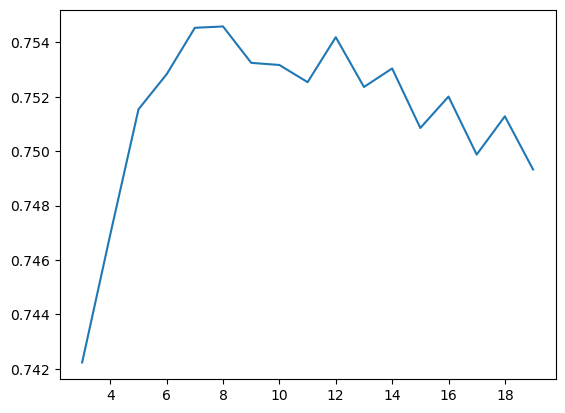

In [15]:
plt.plot([r[0] for r in results], [r[1] for r in results])